In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
df = pd.read_csv('train.csv')

df1 = df[['angle(tBodyAccMean,gravity)','angle(X,gravityMean)','angle(Y,gravityMean)','angle(Z,gravityMean)','Activity']]
df1.columns = map(str.lower, df1.columns)
df1.head()

,"angle(tbodyaccmean,gravity)","angle(x,gravitymean)","angle(y,gravitymean)","angle(z,gravitymean)",activity
0,-0.112754,-0.841247,0.179941,-0.058627,STANDING
1,0.053477,-0.844788,0.180289,-0.054317,STANDING
2,-0.118559,-0.848933,0.180637,-0.049118,STANDING
3,-0.036788,-0.848649,0.181935,-0.047663,STANDING
4,0.123320,-0.847865,0.185151,-0.043892,STANDING


LAYING
STANDING
SITTING
WALKING
WALKING_UPSTAIRS
WALKING_DOWNSTAIRS


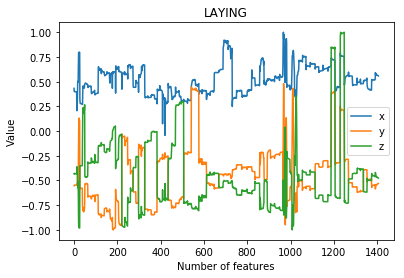

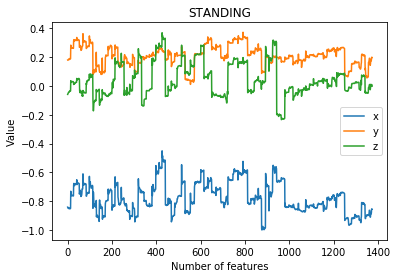

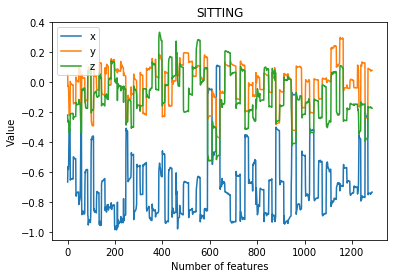

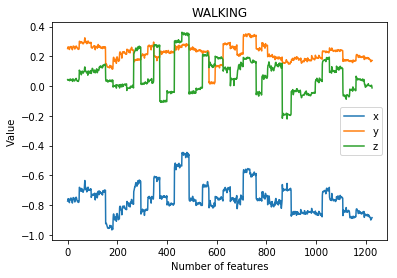

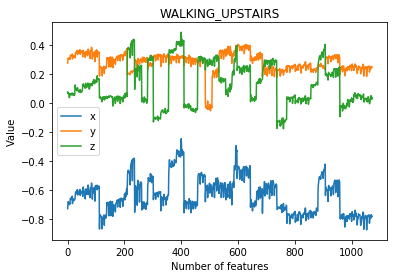

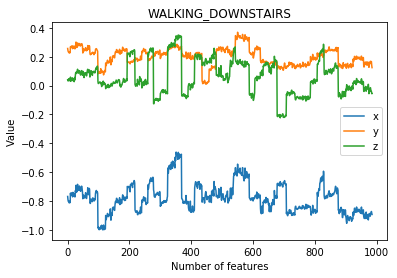

In [90]:
 
x = []
y = []
z = []  
x1= []
count=0
for i in df1['activity'].value_counts().keys():
    print(i)
    x = df1[df1.activity==i]['angle(x,gravitymean)']
    y = df1[df1.activity==i]['angle(y,gravitymean)']
    z = df1[df1.activity==i]['angle(z,gravitymean)']
    x1= df1[df1.activity==i]['angle(tbodyaccmean,gravity)']
    xAxis = np.arange(0, len(x), 1)
    plt.figure(count)
    plt.plot(xAxis, x)
    plt.plot(xAxis, y)
    plt.plot(xAxis, z)
    plt.ylabel('Value')
    plt.xlabel('Number of features')
    plt.legend(['x','y','z'])
    plt.title(i)
    
    count=count+1



2947
2270


Text(0, 0.5, 'Predict activity')

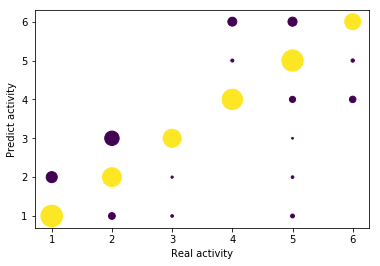

In [122]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

dfTrain=pd.read_csv('train.csv')
dfTest=pd.read_csv('test.csv')
gnb = GaussianNB()
X_test = dfTest.drop('Activity',axis=1)


A=[]
for i in dfTest['Activity']:
    if i == 'LAYING':
        A.append(3)
    if i == 'STANDING':
        A.append(1)
    if i == 'SITTING':
        A.append(2)
    if i == 'WALKING':
        A.append(4)
    if i == 'WALKING_UPSTAIRS':
        A.append(5)
    if i == 'WALKING_DOWNSTAIRS':
        A.append(6)
dfTest['new'] = A 
Y_test = dfTest['new']

A=[]
X_train = dfTrain.drop('Activity',axis=1)
for i in dfTrain['Activity']:
    if i == 'LAYING':
        A.append(3)
    if i == 'STANDING':
        A.append(1)
    if i == 'SITTING':
        A.append(2)
    if i == 'WALKING':
        A.append(4)
    if i == 'WALKING_UPSTAIRS':
        A.append(5)
    if i == 'WALKING_DOWNSTAIRS':
        A.append(6)
dfTrain['new'] = A 
Y_train = dfTrain['new']
area = np.zeros(36)
color = np.zeros(36)
X = np.array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6])
Y = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6])
nb = gnb.fit(X_train,Y_train)
predict = nb.predict(X_test)
index = 0
correct = []
for i in range(len(predict)):
    area[(Y_test[i]-1)*6+(predict[i]-1)]+=1
for i in range(0,6):
    color[i*6+i] = 1
for i in range(len(predict)):
    if predict[i] == Y_test[i]:
        index=index+1
        correct.append(i)
print(len(predict))
print(index)
plt.scatter(X,Y, s = area, c = color)
plt.xlabel('Real activity')
plt.ylabel('Predict activity')
#plt.scatter(Y_train, predict)

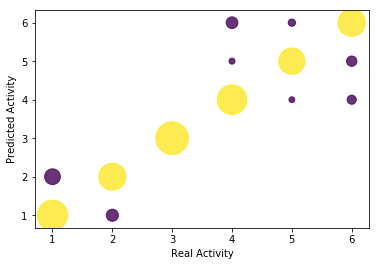

Total correct prediction for Decision Tree:  2522.0 



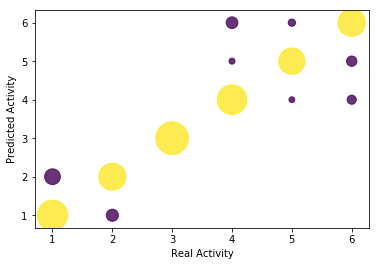

Total correct prediction for Linear Regression:  2522.0 



In [116]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib import pyplot as plt

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train["Activity"] = [1 if value == "STANDING"
                          else 2 if value == "SITTING"
                          else 3 if value == "LAYING"
                          else 4 if value == "WALKING"
                          else 5 if value == "WALKING_DOWNSTAIRS"
                          else 6 for value in data_train["Activity"]]
data_test["Activity"] = [1 if value == "STANDING"
                          else 2 if value == "SITTING"
                          else 3 if value == "LAYING"
                          else 4 if value == "WALKING"
                          else 5 if value == "WALKING_DOWNSTAIRS"
                          else 6 for value in data_test["Activity"]]
X_train = data_train.drop("Activity", axis = 1)
Y_train = data_train["Activity"]


X_test =  data_test.drop("Activity", axis = 1)
Y_test = data_test["Activity"]

#Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_predict_dt = dt.predict(X_test)
X = np.array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6])
Y = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6])
area = np.zeros(36)
color = np.zeros(36)

for i in range(0,6):
    color[i*6+i] = 1

for i in range(len(Y_predict_dt)):
    area[(Y_test[i]-1)*6 + (Y_predict_dt[i]-1)]+=1

correct_dt = 0
for i in range(0,6):
    correct_dt += area[i*6+i]

prediction = pd.DataFrame({'Predicted price': Y_predict_dt}).to_csv('data_results_dt.csv')
csv_input = pd.read_csv('data_results_dt.csv')
csv_input['Real price'] = Y_test
csv_input.to_csv('data_results_dt.csv', index=False)

plt.figure(1)
plt.scatter(X, Y, s = area*2, c = color, alpha = 0.8)
plt.xlabel('Real Activity')
plt.ylabel('Predicted Activity')
plt.show()
print('Total correct prediction for Decision Tree: ', correct_dt, '\n')

#Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict_lr = lr.predict(X_test)
area2 = np.zeros(36)

for i in range(len(Y_predict_lr)):
    Y_predict_lr[i] = round(Y_predict_lr[i])
for i in range(len(Y_predict_lr)):
    area2[(Y_test[i]-1)*6 + (Y_predict_dt[i]-1)]+=1
correct_lr = 0
for i in range(0,6):
    correct_lr += area2[i*6+i]

prediction = pd.DataFrame({'Predicted price': Y_predict_lr}).to_csv('data_results_lr.csv')
csv_input = pd.read_csv('data_results_lr.csv')
csv_input['Real price'] = Y_test
csv_input.to_csv('data_results_lr.csv', index=False)

plt.figure(2)
plt.scatter(X, Y, area2*2, c = color, alpha = 0.8)
plt.xlabel('Real Activity')
plt.ylabel('Predicted Activity')
plt.show()
print('Total correct prediction for Linear Regression: ', correct_lr, '\n')